<a href="https://colab.research.google.com/github/PedroEsch/ELEMAQ_analise_fadiga/blob/main/Elemaq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 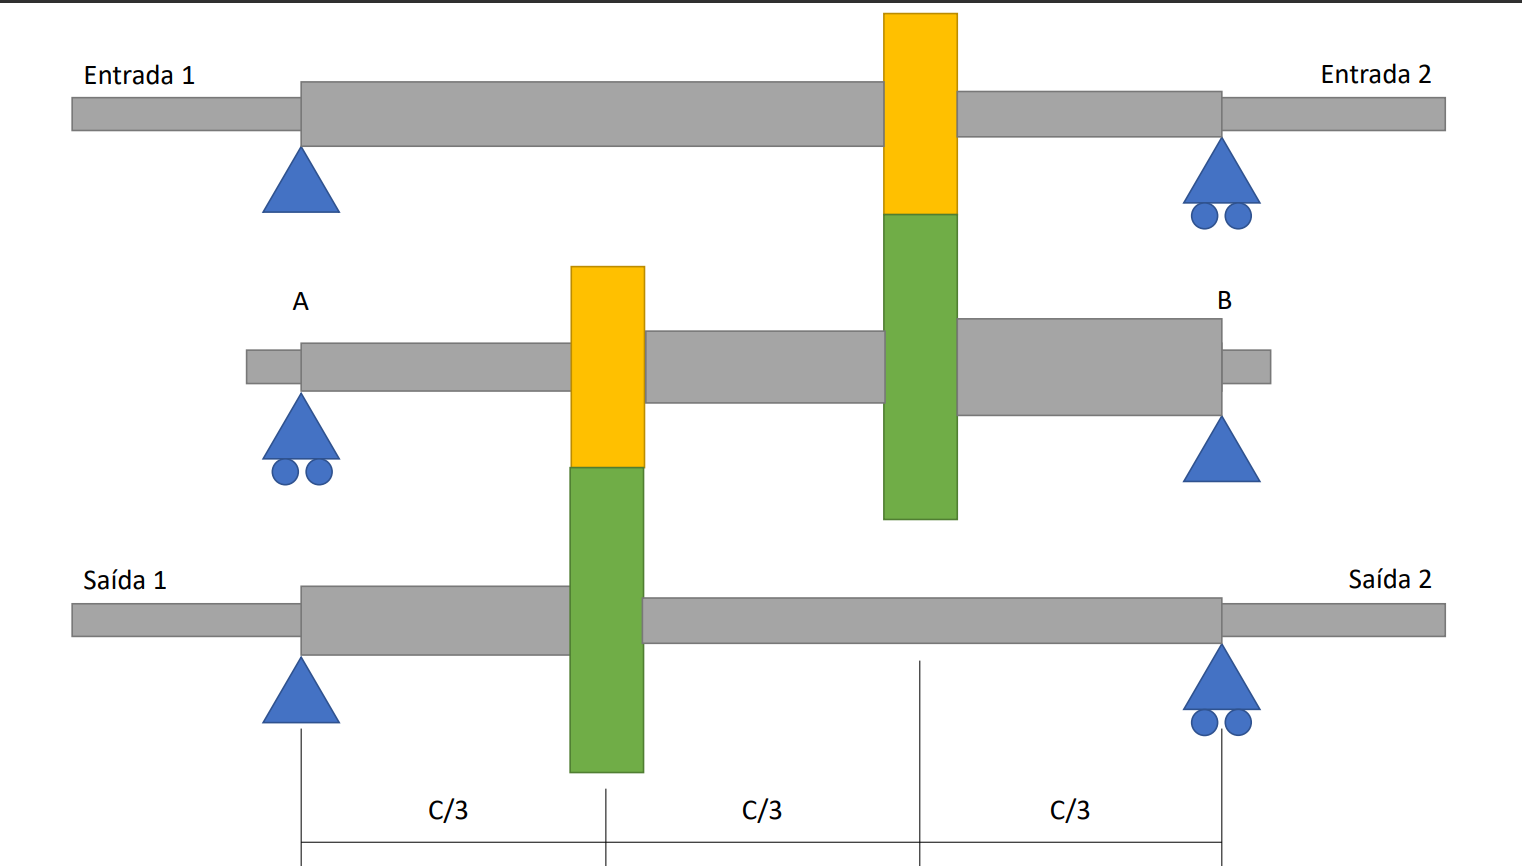

In [ ]:
#@title Bibliotecas.
import numpy as num
import matplotlib.pyplot as plt
from numpy import tan, sin, cos, arccos, arctan, pi, array

**Dados fornecidos**

Redução = 7

Torque de saida = 1060 Nm

Rotação de entrada = 1800 rpm

Configuração 15

In [ ]:
#@title Preencha com os parametros iniciais. Dureza = 250HB{ run: "auto" }

Redução = 7 #@param {type:"slider", min:0, max:20, step:0.5}
red = Redução

Qv = 6 #@param {type:"slider", min:1, max:11, step:1}

Número_de_dentes_do_pinhão = 12 #@param {type:"slider", min:12, max:135, step:1}
np = Número_de_dentes_do_pinhão

Vida_requerida_em_anos = 5 #@param {type:"slider", min:1, max:10, step:1}

Tempo_de_uso_diario_em_horas = 8 #@param {type:"slider", min:0, max:24, step:0.5}

Torque_de_saida_em_Nm = 1060 #@param {type:"number"}
Ts = Torque_de_saida_em_Nm*8.85074576737892 #convertendo para lbin
TsNm = Torque_de_saida_em_Nm

Rotação_de_entrada_em_rpm = 1800 #@param {type:"number"}
rote = Rotação_de_entrada_em_rpm

Espessura_das_engrenagens_em_milimetros = 75 #@param {type:"number"}
F = Espessura_das_engrenagens_em_milimetros/25.4

Comprimento_útil_da_caixa_em_milimetros = 600 #@param {type:"number"}
C = Comprimento_útil_da_caixa_em_milimetros/1000

Raio_do_pinhão_em_milimetros = 75 #@param {type:"number"}
rp = Raio_do_pinhão_em_milimetros/25.4

Sentido_da_rotação_de_entrada = "Anti-horario" #@param ["Horario", "Anti-horario"]
Sentido = Sentido_da_rotação_de_entrada

def ajusteconf(conf):
  if conf == "90":
    return 90
  if conf == "99":
    return 99
  if conf == "99.9":
    return 99.9
  if conf == "99.99":
    return 99.99

Confiabilidade = "99" #@param ["90", "99", "99.9", "99.99"]
conf = ajusteconf(Confiabilidade)

def ajustemotora(mot):
  if mot == "Uniforme":
    return 0
  if mot == "Choque leve":
    return 1
  if mot == "Choque médio":
    return 2

def ajustemovida(mov):
  if mov == "Uniforme":
    return 0
  if mov == "Choque moderado":
    return 1
  if mov == "Choque severo":
    return 2

Maquina_motora ='Uniforme' #@param ["Uniforme", "Choque leve", "Choque médio"]
motora = ajustemotora(Maquina_motora)
Maquina_movida ='Uniforme' #@param ["Uniforme", "Choque moderado", "Choque severo"]
movida = ajustemovida(Maquina_movida)

Coeficiente_de_segurança_mínimo = 1.5 #@param {type:"number"}
safe = Coeficiente_de_segurança_mínimo

Em_caso_de_falha_sugerir_novos_parametros = True #@param {type:"boolean"}

Ne = Vida_requerida_em_anos*(260)*Tempo_de_uso_diario_em_horas*60*rote
Ni = Ne/(red**(1/2))
Ns = Ne/red
roti = rote/(red**(1/2))
rots = rote/red
Te = Ts/red #em lbin
TeNm = TsNm/red #em Nm
Ti = Ts/(red**(1/2))
Pd = np/(2*rp)
rg = rp*(red**(1/2))
Ψ = 20
φ = 25
v = 0.28
Ep = 30*10**6

In [ ]:
#@title Matriz J.
matrizJ = array([ [0,    12,   12,   14,   14,    17,  17,   21,   21,   26,   26,   35,   35,   55,   55,   135,  135,   136,  136 ],
                  [12,   0.47, 0.47, 0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,     0,    0   ],
                  [14,   0.47, 0.5,  0.5,  0.5,  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,     0,    0   ],
                  [17,   0.48, 0.53, 0.51, 0.54, 0.54, 0.54, 0,    0,    0,    0,    0,    0,    0,    0,    0,    0,     0,    0   ],
                  [21,   0.48, 0.56, 0.51, 0.57, 0.55, 0.58, 0.58, 0.58, 0,    0,    0,    0,    0,    0,    0,    0,     0,    0   ],
                  [26,   0.49, 0.59, 0.52, 0.6,  0.55, 0.6,  0.69, 0.61, 0.62, 0.62, 0,    0,    0,    0,    0,    0,     0,    0   ],
                  [35,   0.49, 0.62, 0.53, 0.63, 0.56, 0.64, 0.6,  0.64, 0.62, 0.65, 0.66, 0.66, 0,    0,    0,    0,     0,    0   ],
                  [55,   0.50, 0.66, 0.53, 0.67, 0.57, 0.67, 0.6,  0.68, 0.63, 0.69, 0.67, 0.7,  0.71, 0.71, 0,    0,     0,    0   ],
                  [135,  0.51, 0.7,  0.54, 0.71, 0.58, 0.72, 0.62, 0.72, 0.65, 0.73, 0.68, 0.74, 0.72, 0.75, 0.76, 0.76,  0,    0   ],
                  [136,  0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,     0,    0   ]])

In [ ]:
#@title Funções.
def fM(D, F):
  M = array([  D[1]*F[2]-D[2]*F[1], D[2]*F[0]-D[0]*F[2] , D[0]*F[1]-D[1]*F[0]  ])
  return M

def fJ(np, red):
  ng = np*red**(1/2)
  if ng > 135:
    return 0, 0

  i = 0
  while matrizJ[0,i] < np:
    i = i+1
  if matrizJ[0,i] == np:
    x = i
  else:
    x = i-2

  j=0
  while matrizJ[j,0] < ng:
    j = j+1
  if matrizJ[j,0] == ng:
    y = j
  else:
    y = j-1

  #calculando Jp
  a = matrizJ[y,x]+((ng-matrizJ[y,0])/(matrizJ[y+1,0]-matrizJ[y,0]))*(matrizJ[y+1,x]-matrizJ[y,x])
  b = matrizJ[y,x+2]+((ng-matrizJ[y,0])/(matrizJ[y+1,0]-matrizJ[y,0]))*(matrizJ[y+1,x+2]-matrizJ[y,x+2])
  Jp = a + ((np-matrizJ[0,x])/(matrizJ[0,x+2]-matrizJ[0,x]))*(b-a)

  #calculando Jg
  c = matrizJ[y,x+1]+((ng-matrizJ[y,0])/(matrizJ[y+1,0]-matrizJ[y,0]))*(matrizJ[y+1,x+1]-matrizJ[y,x+1])
  d = matrizJ[y,x+3]+((ng-matrizJ[y,0])/(matrizJ[y+1,0]-matrizJ[y,0]))*(matrizJ[y+1,x+3]-matrizJ[y,x+3])
  Jg = c + ((np-matrizJ[0,x+1])/(matrizJ[0,x+3]-matrizJ[0,x+1]))*(d-c)
  return Jp, Jg

def fKv(Qv, Vt_in):
  if Qv >= 6:
    B = ((12-Qv)**(2/3))/4
    A = 50 + 56*(1-B)
    return (A/(A+200*(Vt_in)**(1/2)))**B
  else:
    return 50/(50+(200*Vt_in)**(1/2))

def fKm(F):
  if F <= 2:
    return 1.6
  elif F <= 6:
    return 1.6 + (1.7-1.6)*(F-2)/(6-2)
  elif F <= 9:
    return 1.7 + (1.8-1.7)*(F-6)/(9-6)
  elif F <= 20:
    return 1.8 + (2-1.8)*(F-9)/(20-9)
  else:
    return 2

def fKa(motora, movida):
  matrizKa = array([[1,     1.25, 1.75],
                    [1.25,  1.5,  2   ],
                    [1.5,   1.75, 2.25]])
  return matrizKa[motora, movida]

def fKl(N):
  if N > 3*10**6:
    return 1.3558*N**(-0.0178)
  else:
    return 9.4518*N**(-0.148)

def fKr(conf):
  if conf == 90:
    return 0.85
  elif conf == 99:
    return 1
  elif conf == 99.9:
    return 1.25
  elif conf == 99.99:
    return 1.5

def segb(T, r, Vt, J, N):
  wt = T/r
  Kb = 1
  Ks = 1
  Ki = 1
  Kv = fKv (Qv, Vt)
  Km = fKm(F)
  Ka = fKa(motora, movida)
  σb = (wt*Pd*Ka*Km*Ks*Kb*Ki)/(F*J*Kv)

  Kl = fKl(N)
  Kt = 1
  Kr = fKr(conf)
  sfbl = 6235+174*(250)-0.126*(250**2)
  Sfb = Kl*sfbl/(Kt*Kr)

  return Sfb/σb

def segc(Tp, Vt, N):
  wt = Tp/rp
  Cs = 1
  Cv = fKv (Qv, Vt)
  Cm = fKm(F)
  Ca = fKa(motora, movida)
  ap = 0
  ag = 0
  z = (((rp+ap)**2)-((rp*cos(φ))**2))**(1/2) + (((rg+ag)**2)-((rg*cos(φ))**2))**(1/2) - (rp+rg)*sin(φ)
  mp = (z*Pd)/(pi*cos(φ))
  mf = (F*Pd*tan(Ψ))/pi
  nr = mp
  cf = 1
  while nr > 1:
    nr = nr-1
  na = mf
  while na > 1:
    na = na-1
  px = F/mf
  φn = arctan(tan(φ)*cos(Ψ))
  Ψb = arccos(cos(Ψ)*cos(φn)/cos(φ))
  if na < 1-nr:
    Lmin = (mp*F-na*nr*px)/cos(Ψb)
  else:
    Lmin = (mp*F-(1-na)*(1-nr)*px)/cos(Ψb)
  mN = F/Lmin
  pp = (((0.5*((rp+ap)+((rp+rg)-rg-ag)))**2)-((rp*cos(φ))**2))**(1/2)
  pg = (rp+rg)*sin(φ)-pp
  Cp = (1/(pi*((1-v**2)/Ep)+(1-v**2)/Ep))**(1/2)
  I = cos(φ)/(((1/pp)+(1/pg)*2*rp*mN))
  σc = Cp*(((wt*Ca*Cm*Cs*cf)/(F*I*2*rp*Cv))**(1/2))

  Cr = fKr(conf)
  Ct = 1
  Ch = 1
  if N > 10**7:
    Cl = 1.4488*(N**-0.023)
  else:
    Cl = 2.466*(N**-0.056)
  Sfcl = 27000 + 364*250
  Sfc = Cl*Ch*Sfcl/(Ct*Cr)

  return (Sfc/σc)**2

def fd(d, Ma, Mm, Ta, Tm):
  #D/d = 1.2
  A = 0.97098
  b = -0.21796
  kt = A*((0.05)**b)

  A = 0.83425
  b = -0.21649
  kts = A*((0.05)**b)

  q = 1/(1+0.05/(2.5/25.4)**(1/2))
  qs = 1/(1+0.04/(2.5/25.4)**(1/2))

  kf = 1 + q*(kt-1)
  kfm = kf
  kfs = 1 + qs*(kts-1)
  kfsm = kfs

  Sut = 814*10**6 #pascal
  Sel = 0.5*Sut
  Cl = 1
  Cd = 1.189*d**(-0.097)
  Cs = 4.51*(Sut/10**6)**(-0.265) #usinado
  Ct = 1
  Cr = 1

  d1 = d
  Cd = 1.189*d1**(-0.097)
  Se = Cl*Cd*Cs*Ct*Cr*Sel
  d2 = ((32*safe/pi)*((((kf*Ma)**2+(3/4)*(kfs*Ta)**2)**(1/2))/Se + (((kfm*Mm)**2+(3/4)*(kfsm*Tm)**2)**(1/2))/Sut))**(1/3)
  while (d2-d1)/d2 > 0.001:
    d1 = d2
    Cd = 1.189*d1**(-0.097)
    Se = Cl*Cd*Cs*Ct*Cr*Sel
    d2 = ((32*safe/pi)*((((kf*Ma)**2+(3/4)*(kfs*Ta)**2)**(1/2))/Se + (((kfm*Mm)**2+(3/4)*(kfsm*Tm)**2)**(1/2))/Sut))**(1/3)

  return d2

In [ ]:
#@title Nbs e Ncs
def Nbs(printar):

  #Pinhão 1
  Vt1 = rote*2*pi*rp/12 #ft/min
  Nb1 = segb(Te, rp, Vt1, fJ(np, red)[0], Ne)


  #Pinhão 2
  Vt3 = roti*2*pi*rp/12 #ft/min
  Nb3 = segb(Ti, rp, Vt3, fJ(np, red)[0], Ni)


  #Engrenagem 1
  Vt2 = roti*2*pi*rg/12 #ft/min
  Nb2 = segb(Ti, rg, Vt2, fJ(np, red)[1], Ni)


  #Engrenagem 2
  Vt4 = rots*2*pi*rg/12 #ft/min
  Nb4 = segb(Ts, rg, Vt4, fJ(np, red)[1], Ns)

  if printar == True:
    print("\nNbs:")
    print("Nb do pinhão 1: ", Nb1)
    print("Nb do pinhão 2: ", Nb3)
    print("Nb da engrenagem 1: ", Nb2)
    print("Nb da engrenagem 2: ", Nb4)

  return Nb1, Nb2, Nb3, Nb4

def Ncs(printar):

  #Pinhão 1
  Vt1 = rote*2*pi*rp/12 #ft/min
  Nc1 = segc(Te, Vt1, Ne)


  #Pinhão 2
  Vt3 = roti*2*pi*rp/12 #ft/min
  Nc3 = segc(Ti, Vt3, Ni)


  #Engrenagem 1
  Vt2 = roti*2*pi*rg/12 #ft/min
  Nc2 = segc(Te, Vt2, Ni)


  #Engrenagem 2
  Vt4 = rots*2*pi*rg/12 #ft/min
  Nc4 = segc(Ti, Vt4, Ns)

  if printar == True:
    print("\nNcs:")
    print("Nc do pinhão 1: ", Nc1)
    print("Nc do pinhão 2: ", Nc3)
    print("Nc da engrenagem 1: ", Nc2)
    print("Nc da engrenagem 2: ", Nc4)

  return Nc1, Nc2, Nc3, Nc4

print("Resultados iniciais:")
Nbatual = Nbs(True)
Ncatual = Ncs(True)

Resultados iniciais:

Nbs:
Nb do pinhão 1:  0.5262624792558563
Nb do pinhão 2:  0.30151909630893164
Nb da engrenagem 1:  0.6656738424682738
Nb da engrenagem 2:  0.3813940444725226

Ncs:
Nc do pinhão 1:  0.25407880554995504
Nc do pinhão 2:  0.14962244139893957
Nc da engrenagem 1:  0.26570865070355126
Nc da engrenagem 2:  0.15647104815780033


In [ ]:
#@title Correção nos valores de rp e F
if Em_caso_de_falha_sugerir_novos_parametros == True:
  Nbatual = Nbs(False)
  Ncatual = Ncs(False)
  seg = array([Nbatual[0],Nbatual[1],Nbatual[2],Nbatual[3],Ncatual[0],Ncatual[1],Ncatual[2],Ncatual[3]])
  tranca = 0
  while tranca < 9:
    k = 0
    while k < 8:
      if seg[k] < safe:
        k = k + 1
        tranca = 0
        rp = rp+0.001
        Pd = np/(2*rp)
        rg = rp*(red**(1/2))
        F = F+0.001
        Nbatual = Nbs(False)
        Ncatual = Ncs(False)
        seg = array([Nbatual[0],Nbatual[1],Nbatual[2],Nbatual[3],Ncatual[0],Ncatual[1],Ncatual[2],Ncatual[3]])
      else:
        k = k+1
        tranca = tranca + 1

  print("Valores finais de rp e F, com os coeficientes de segurança correspondentes:")
  print("\nRaio do pinhão: ", 25.4*rp, "mm")
  print("Espessura da engrenagem: ", 25.4*F, "mm")
  Nbatual = Nbs(True)
  Ncatual = Ncs(True)
else:
  print("Não foi solicitado uma correção.")

Valores finais de rp e F, com os coeficientes de segurança correspondentes:

Raio do pinhão:  141.47180000001038 mm
Espessura da engrenagem:  141.47180000001038 mm

Nbs:
Nb do pinhão 1:  2.6161827072843464
Nb do pinhão 2:  1.5001064931451196
Nb da engrenagem 1:  3.3092315413015307
Nb da engrenagem 2:  1.8974973378598636

Ncs:
Nc do pinhão 1:  3.6810407428369865
Nc do pinhão 2:  2.1694044513025257
Nc da engrenagem 1:  3.849531513842503
Nc da engrenagem 2:  2.2687037131577616


In [ ]:
#@title Verificação do tamanho útil
if C/3 <= F*0.0254:
  C=3*F*0.0254
  print("Foi necessario alterar o comprimento útil, o valor mínimo é:", C, "metros")
else:
  print("O tamanho está aceitável")

O tamanho está aceitável


Forças:




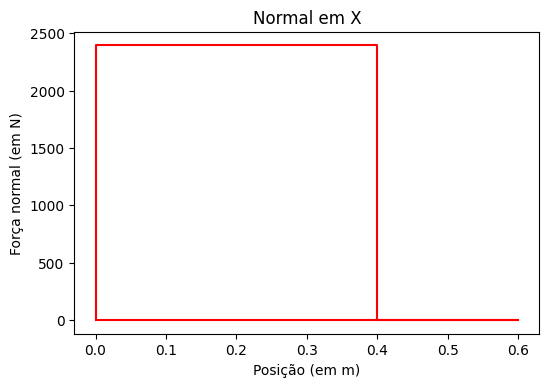

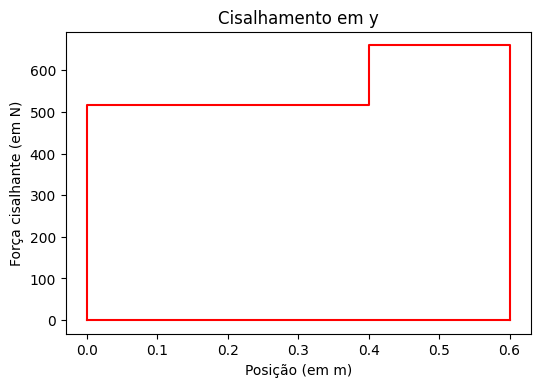

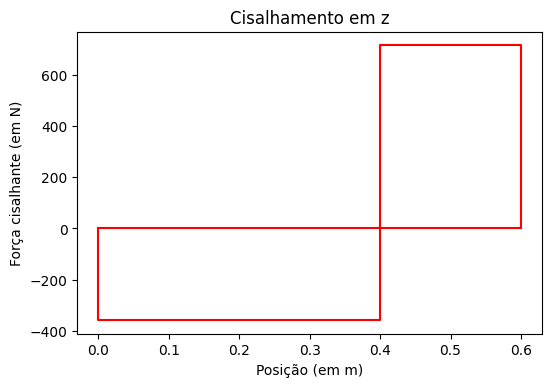



Momentos




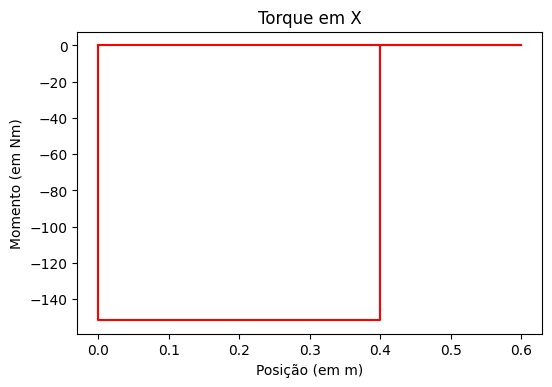

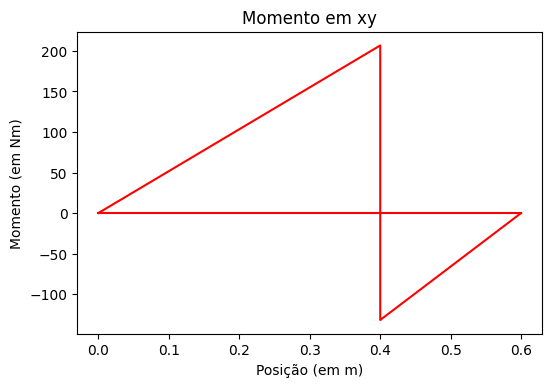

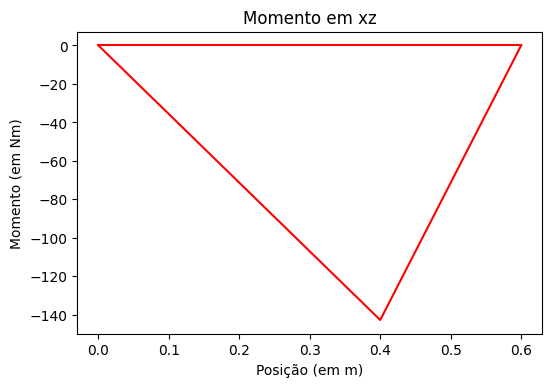

In [ ]:
#@title Analise eixo da entrada

rp = rp*0.0254 #covertendo para metros

#Forças no centro do pinhão
wte = TeNm/rp
wre = wte*tan(φ)
wae = wte*tan(Ψ)

if Sentido == "Horario":
  wte = -wte

Fpe = array([-wae, -wre, wte])

Dpe = array([0,-rp,0])

#Somatorio de momentos em A = 0

Mpe = fM(Dpe, Fpe)#momento no centro do pinhão

Distp = array([-2*C/3,0,0])

MBe = fM(Distp, Fpe) + Mpe #momento gerados por B em A

FBe = array([0, MBe[2]/C, -MBe[1]/C])

#Somatorio de forças = 0

FAe = -(Fpe+FBe)

#Gráfico de cisalhamento
Posec = array([0, 0, 2*C/3, 2*C/3, C, C])
Cex = array([0,FAe[0],FAe[0],FAe[0]+Fpe[0],FAe[0]+Fpe[0],FAe[0]+Fpe[0]+FBe[0]])
Cey = array([0,FAe[1],FAe[1],FAe[1]+Fpe[1],FAe[1]+Fpe[1],FAe[1]+Fpe[1]+FBe[1]])
Cez = array([0,FAe[2],FAe[2],FAe[2]+Fpe[2],FAe[2]+Fpe[2],FAe[2]+Fpe[2]+FBe[2]])
print("Forças:")

retac = array([0,0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Normal em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Força normal (em N)")
plt.plot(Posec,Cex, color = 'r')
plt.plot(Posec,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em y")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Posec,Cey, color = 'r')
plt.plot(Posec,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em z")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Posec,Cez, color = 'r')
plt.plot(Posec,retac, color = 'r')
plt.show()

#Gráfico de momento
Posem = array([0, 0, 2*C/3, 2*C/3, C])
Mex = array([0,Mpe[0],Mpe[0],0,0])
Mey = array([0, 0, Cey[1]*Posem[2], Cey[1]*Posem[2] + Mpe[2], Cey[1]*Posem[2] + Mpe[2] + Cey[3]*(Posem[4]-Posem[2])])
Mez = array([0, 0, Cez[1]*Posem[2], Cez[1]*Posem[2] + Mpe[1], Cez[1]*Posem[2] + Mpe[1] + Cez[3]*(Posem[4]-Posem[2])])
print("\n\nMomentos")

retam = array([0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Torque em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posem,Mex, color = 'r')
plt.plot(Posem,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xy")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posem,Mey, color = 'r')
plt.plot(Posem,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xz")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posem,Mez, color = 'r')
plt.plot(Posem,retam, color = 'r')
plt.show()

In [ ]:
#@title Diametro mínimo do eixo de entrada
Mae = (Mey**2+Mez**2)**(1/2)
Maemax = Mae[0]
for i in range(len(Mey)):
  if Maemax < Mae[i]:
    Maemax = Mae[i]

Taemax = (Mex[0]**2)**(1/2)
for i in range(len(Mex)):
  if Taemax < (Mex[i]**2)**(1/2):
    Taemax = (Mex[i]**2)**(1/2)

print("O diametro mínimo é: ", 1000*fd(0.001,Maemax,0,Taemax,0), "milimetros")

O diametro mínimo é:  24.04046637021167 milimetros


Forças:




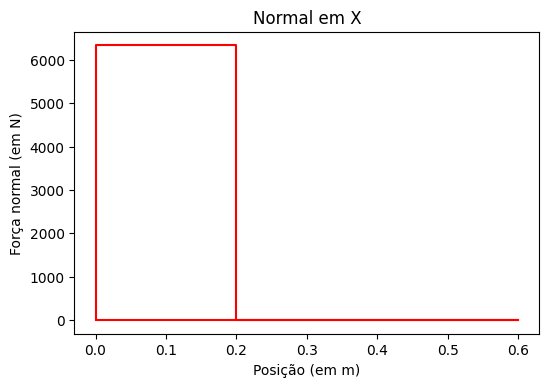

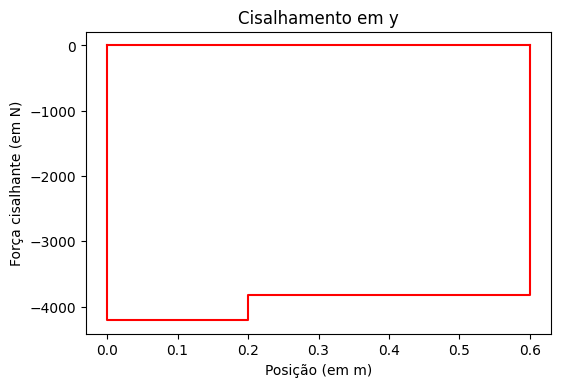

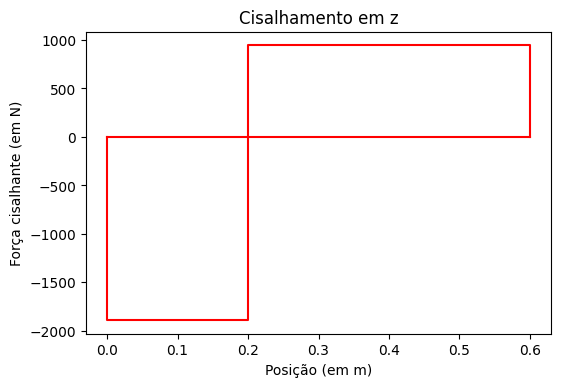



Momentos




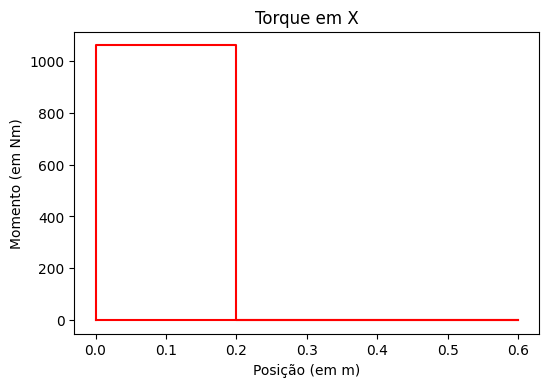

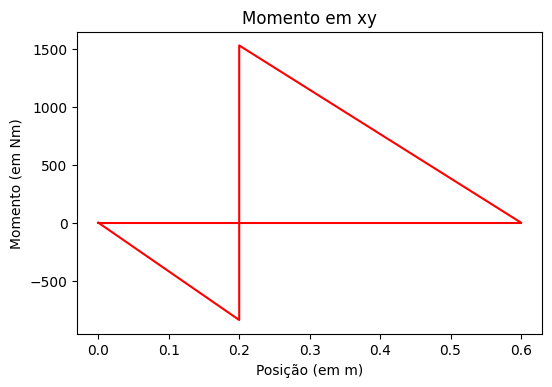

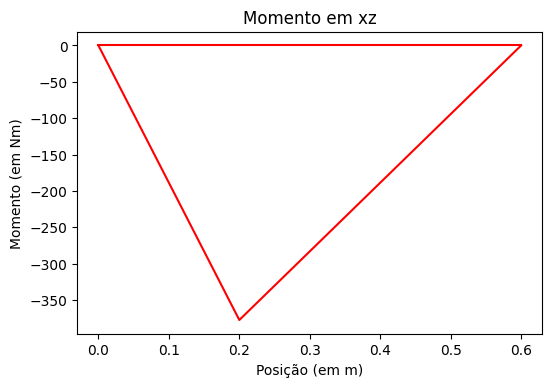

In [ ]:
#@title Analise eixo da saida

rg = rp*(red**(1/2))

#Forças no centro da engrenagem
wts = TsNm/rg
wrs = wts*tan(φ)
was = wts*tan(Ψ)

if Sentido == "Horario":
  wts = -wts

Fgs = array([-was, -wrs, wts])

Dps = array([0,rg,0])

#Somatorio de momentos em A = 0

Mps = fM(Dps, Fgs)#momento no centro da engrenagem

Distg = array([-C/3,0,0])

MBs = fM(Distg, Fgs) + Mps #momento gerados por B em A

FBs = array([0, MBs[2]/C, -MBs[1]/C])

#Somatorio de forças = 0

FAs = -(Fgs+FBs)

#Gráfico de cisalhamento
Possc = array([0, 0, C/3, C/3, C, C])
Csx = array([0,FAs[0],FAs[0],FAs[0]+Fgs[0],FAs[0]+Fgs[0],FAs[0]+Fgs[0]+FBs[0]])
Csy = array([0,FAs[1],FAs[1],FAs[1]+Fgs[1],FAs[1]+Fgs[1],FAs[1]+Fgs[1]+FBs[1]])
Csz = array([0,FAs[2],FAs[2],FAs[2]+Fgs[2],FAs[2]+Fgs[2],FAs[2]+Fgs[2]+FBs[2]])
print("Forças:")

retac = array([0,0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Normal em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Força normal (em N)")
plt.plot(Possc,Csx, color = 'r')
plt.plot(Possc,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em y")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Possc,Csy, color = 'r')
plt.plot(Possc,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em z")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Possc,Csz, color = 'r')
plt.plot(Possc,retac, color = 'r')
plt.show()

#Gráfico de momento
Possm = array([0, 0, C/3, C/3, C])
Msx = array([0,Mps[0],Mps[0],0,0])
Msy = array([0, 0, Csy[1]*Possm[2], Csy[1]*Possm[2] + Mps[2], Csy[1]*Possm[2] + Mps[2] + Csy[3]*(Possm[4]-Possm[2])])
Msz = array([0, 0, Csz[1]*Possm[2], Csz[1]*Possm[2] + Mps[1], Csz[1]*Possm[2] + Mps[1] + Csz[3]*(Possm[4]-Possm[2])])
print("\n\nMomentos")

retam = array([0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Torque em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Possm,Msx, color = 'r')
plt.plot(Possm,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xy")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Possm,Msy, color = 'r')
plt.plot(Possm,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xz")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Possm,Msz, color = 'r')
plt.plot(Possm,retam, color = 'r')
plt.show()

In [ ]:
#@title Diametro mínimo do eixo de saida
Mas = (Msy**2+Msz**2)**(1/2)
Masmax = Mas[0]
for i in range(len(Msy)):
  if Masmax < Mas[i]:
    Masmax = Mas[i]

Tasmax = (Msx[0]**2)**(1/2)
for i in range(len(Msx)):
  if Tasmax < (Msx[i]**2)**(1/2):
    Tasmax = (Msx[i]**2)**(1/2)

print("O diametro mínimo é: ", 1000*fd(0.001,Masmax,0,Tasmax,0), "milímetros")

O diametro mínimo é:  45.57958729057215 milímetros


Forças:




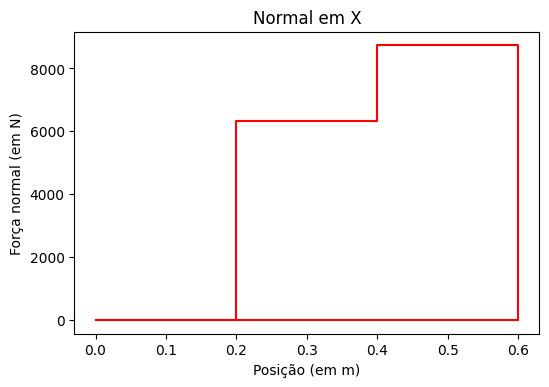

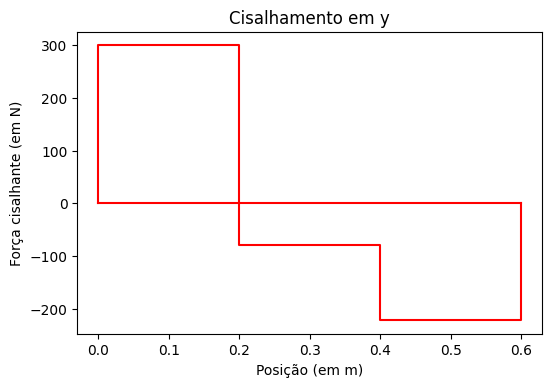

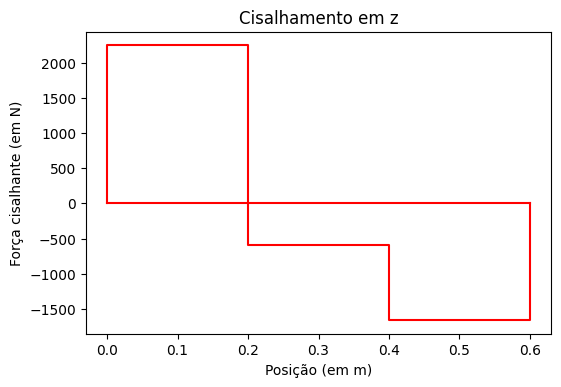



Momentos




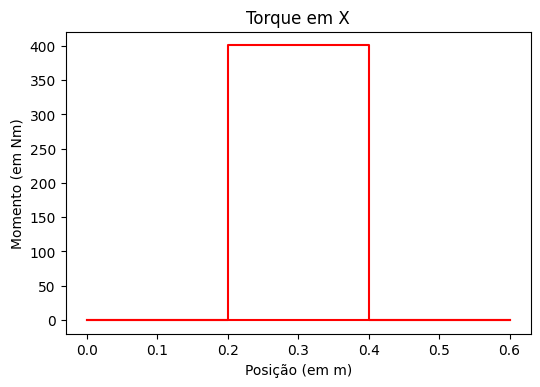

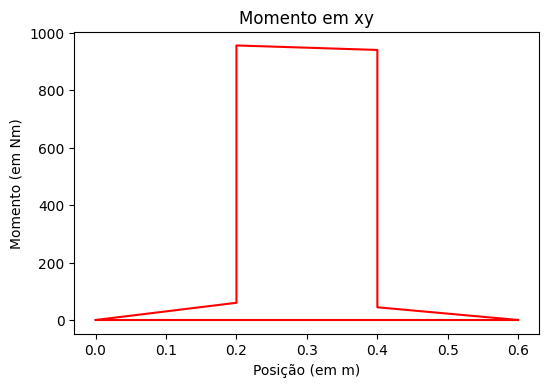

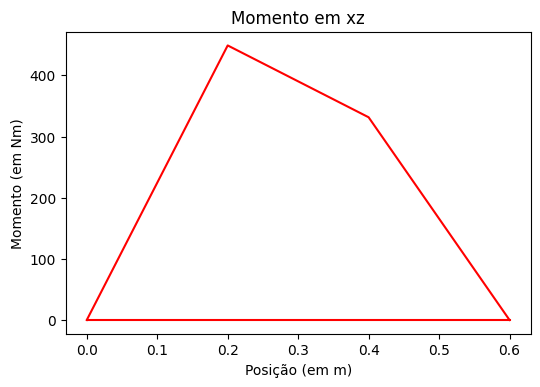

In [ ]:
#@title Analise eixo intermediario

#Forças no centro da engrenagem

Fpi = -Fgs
Fgi = -Fpe

Dpi = array([0,-rp,0])
Dgi = array([0,rg,0])

#Somatorio de momentos em A = 0

Mpi = fM(Dpi, Fpi)#momento no centro do pinhão
Mgi = fM(Dgi, Fgi)#momento no centro da engrenagem

Distp = array([-C/3,0,0])
Distg = array([-2*C/3,0,0])

MBi = fM(Distp, Fpi) + Mpi + fM(Distg, Fgi) +Mgi #momento gerados por B em A

FBi = array([-(Fpi[0]+Fgi[0]), MBi[2]/C, -MBi[1]/C])

#Somatorio de forças = 0

FAi = -(Fpi+Fgi+FBi)

#Gráfico de cisalhamento
Posic = array([0, 0, C/3, C/3, 2*C/3, 2*C/3, C, C])
Cix = array([0,FAi[0],FAi[0],FAi[0]+Fpi[0],FAi[0]+Fpi[0],FAi[0]+Fpi[0]+Fgi[0],FAi[0]+Fpi[0]+Fgi[0],FAi[0]+Fpi[0]+Fgi[0]+FBi[0]])
Ciy = array([0,FAi[1],FAi[1],FAi[1]+Fpi[1],FAi[1]+Fpi[1],FAi[1]+Fpi[1]+Fgi[1],FAi[1]+Fpi[1]+Fgi[1],FAi[1]+Fpi[1]+Fgi[1]+FBi[1]])
Ciz = array([0,FAi[2],FAi[2],FAi[2]+Fpi[2],FAi[2]+Fpi[2],FAi[2]+Fpi[2]+Fgi[2],FAi[2]+Fpi[2]+Fgi[2],FAi[2]+Fpi[2]+Fgi[2]+FBi[2]])
print("Forças:")

retac = array([0,0,0,0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Normal em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Força normal (em N)")
plt.plot(Posic,Cix, color = 'r')
plt.plot(Posic,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em y")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Posic,Ciy, color = 'r')
plt.plot(Posic,retac, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Cisalhamento em z")
plt.xlabel("Posição (em m)")
plt.ylabel("Força cisalhante (em N)")
plt.plot(Posic,Ciz, color = 'r')
plt.plot(Posic,retac, color = 'r')
plt.show()

#Gráfico de momento
Posim = array([0, 0, C/3, C/3, 2*C/3, 2*C/3, C])
Mix = array([0, 0, 0, Mpi[0], Mpi[0], Mpi[0]+Mgi[0], Mpi[0]+Mgi[0]])
Miy = array([0, 0, Ciy[1]*Posim[2], Ciy[1]*Posim[2] + Mpi[2], Ciy[1]*Posim[2] + Mpi[2] + Ciy[3]*(Posim[4]-Posim[2]), Ciy[1]*Posim[2] + Mpi[2] + Ciy[3]*(Posim[4]-Posim[2]) + Mgi[2], Ciy[1]*Posim[2] + Mpi[2] + Ciy[3]*(Posim[4]-Posim[2]) + Mgi[2] + Ciy[5]*(Posim[6]-Posim[4])])
Miz = array([0, 0, Ciz[1]*Posim[2], Ciz[1]*Posim[2] + Mpi[1], Ciz[1]*Posim[2] + Mpi[1] + Ciz[3]*(Posim[4]-Posim[2]), Ciz[1]*Posim[2] + Mpi[1] + Ciz[3]*(Posim[4]-Posim[2]) + Mgi[1], Ciz[1]*Posim[2] + Mpi[1] + Ciz[3]*(Posim[4]-Posim[2]) + Mgi[1] + Ciz[5]*(Posim[6]-Posim[4])])
print("\n\nMomentos")

retam = array([0,0,0,0,0,0,0])

print("\n")
plt.figure(dpi=100)
plt.title("Torque em X")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posim,Mix, color = 'r')
plt.plot(Posim,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xy")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posim,Miy, color = 'r')
plt.plot(Posim,retam, color = 'r')
plt.show()
print("\n")
plt.figure(dpi=100)
plt.title("Momento em xz")
plt.xlabel("Posição (em m)")
plt.ylabel("Momento (em Nm)")
plt.plot(Posim,Miz, color = 'r')
plt.plot(Posim,retam, color = 'r')
plt.show()

In [ ]:
#@title Diametro mínimo do eixo intermediario
Mai = (Miy**2+Miz**2)**(1/2)
Maimax = Mai[0]
for i in range(len(Miy)):
  if Maimax < Mai[i]:
    Maimax = Mai[i]

Taimax = (Mix[0]**2)**(1/2)
for i in range(len(Mix)):
  if Taimax < (Mix[i]**2)**(1/2):
    Taimax = (Mix[i]**2)**(1/2)

print("O diametro mínimo é: ", 1000*fd(0.001,Maimax,0,Taimax,0), "milímetros")

O diametro mínimo é:  38.6861832226491 milímetros


In [ ]:
#@title Dados para escolha de mancal
print("Entrada")
print("Rotação: ", rote, "rpm")
print("Força radial em A: ", (FAe[1]**2+FAe[2]**2)**(1/2), "N")
print("Força axial em A: ", FAe[0], "N")
print("Força radial em B: ", (FBe[1]**2+FBe[2]**2)**(1/2), "N")
print("Força axial em B: ", FBe[0], "N")
print("\nIntermediário")
print("Rotação: ", roti, "rpm")
print("Força radial em A: ", (FAi[1]**2+FAi[2]**2)**(1/2), "N")
print("Força axial em A: ", FAi[0], "N")
print("Força radial em B: ", (FBi[1]**2+FBi[2]**2)**(1/2), "N")
print("Força axial em B: ", FBi[0], "N")
print("\nSaída")
print("Rotação: ", rots, "rpm")
print("Força radial em A: ", (FAs[1]**2+FAs[2]**2)**(1/2), "N")
print("Força axial em A: ", FAs[0], "N")
print("Força radial em B: ", (FBs[1]**2+FBs[2]**2)**(1/2), "N")
print("Força axial em B: ", FBs[0], "N")

Entrada
Rotação:  1800 rpm
Força radial em A:  628.1441782389996 N
Força axial em A:  2394.612112376614 N
Força radial em B:  971.942972190437 N
Força axial em B:  0.0 N

Intermediário
Rotação:  680.3360514166089 rpm
Força radial em A:  2264.6888809896254 N
Força axial em A:  -0.0 N
Força radial em B:  1672.2843444433563 N
Força axial em B:  -8730.16024818819 N

Saída
Rotação:  257.14285714285717 rpm
Força radial em A:  4608.852362466172 N
Força axial em A:  6335.548135811575 N
Força radial em B:  3940.9969095049146 N
Força axial em B:  0.0 N
